# Análises dos componentes principais (PCA)

## Caso 01: Classificação Estelar

Inserção do banco

In [ ]:
#Importando as bibliotecas gerais:
import pandas as pd
import numpy as np
import time

In [ ]:
#Inserção do banco:
dataset_estelar = pd.read_csv('/content/drive/MyDrive/Banco de dados/PCA_Estelar.csv', delimiter=',')
dataset_estelar

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
#Seperando os recursos:
x = dataset_estelar.loc[:, dataset_estelar.columns != 'class'].values
y = dataset_estelar['class'].values

Como fará uma classificação por meio desse banco, faz-se necessário separa os recursos, ou seja, os dados que serão usados para treinar - x -, e os classificações, são aquelas já feitas para que o algoritmo possa comparar - y -. Lembrando esse é um método supervisionado, ou seja, cede-se os resultados corretos ao algoritmo a fim de comparar para se certificar de que as classificações foram feitas corretamente. Essa classificações já determinadas são o eixo y.

Método .loc:

O método .loc é um método de localização de valores diponibilizado pelo pandas. Esse método exige dois parâmetros básicos: o primeiro são as linhas que são extraídas, nesse caso, ao ceder os : com é parâmetro, aponta-se que se deseja todas as linhas; e as colunas que serão varridas, nesse caso, ao ceder dataset_stellar.columns != 'class', apontou-se todos as colunas diferentes de class, como varredura.

Normalização dos dados:

In [ ]:
#Normalização do eixo y:
from sklearn.preprocessing import LabelEncoder
labelenconder_y = LabelEncoder()
y = labelenconder_y.fit_transform(y)

Converte as classes - informações textuais - em números inteiros. Ressalta-se que os algoritmos de aprendizado de máquinas, com ressalva de algumas exceções de algoritmos de processamento de linguagem natural, não podem receber informações textuais. Então eles devem ser convertidos em informações numéricas.

In [ ]:
#Normalização do eixo x:
from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
x = scale_obj.fit_transform(x.astype(float))

Comumente, dados pertencentes a um banco não estão na mesma escala. A biblioteca StandardScaler irá criar um escala para as colunas considerando o peso dos valores de suas linhas, para manter um mesmo padrão que facilite o aprendizado.

In [ ]:
#Normalização das amostras:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15)

Por fim, normaliza-se as amostras. Quando se lida com um algoritmo de aprendizado, parte dos dados são para treino, ou seja, usados como recurso para que o algoritmo funcione e crie as conexões, e outra para teste, ou seja, para averiguar se o aprendizado adquirido é realmente eficiente. Separou-se 15% do banco para teste. Lembrando que se recomenda sempre um percentual maior para treino.

Inserção da modalidade de algoritmo de aprendizado:

In [ ]:
#Algotimo de aprendizado modalidade Logistic Regression:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=400)
start_time = time.perf_counter()
model.fit(xtrain,ytrain)
end_time = time.perf_counter()

print(f'Tempo de treino {end_time - start_time} em segundos')

Tempo de treino 4.677949206999983 em segundos


Entre as modalidades de algoritmo de aprendizado de máquina o mais simples que há é o Logistic Regression. Embora um algoritmo básico de aprendizado, é essencial o aprendizado de como os demais algoritmos de aprendizado funciona, por isso o escolheu.

O parâmetro max_iter cede quanta interações o algoritmo pode fazer com ele mesmo para se autoajustar, isto é, ele repitirá 400 vezes o 'aprendizado' para definitivamente aprender e poder classificar de forma autônoma.

In [ ]:
#Métrica de acurária:
print(f'O valor do score é: {model.score(xtest,ytest)}')

O valor do score é: 0.9564


Nesse caso essa métrica está comparando o resultado das inferências feitas com o gabarito de classificações que é o eixo y.

Gráfico de aprendizado:

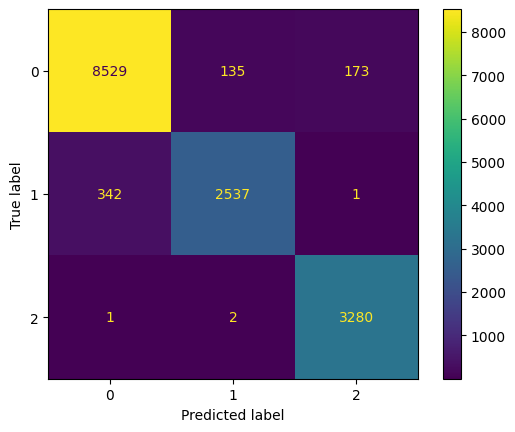

In [ ]:
#Gerando gráfico de matriz de confusão:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

A matriz de confusão é uma forma visual de apresentar a eficiência do algoritmo de aprenzido de máquina de classificação. Baseia-se na ideal de uma tabela de quadrantes com significados pré-definidos. Verdadeiro positivo (true positive - TP): mostra quantas das classes que se está buscando prever foram prevista corretamente; Falso positivo (false positive - FP): mostra quantas das classes que se está buscando prever foram previstas incorretamente; Verdadeiro negativo (true negative - TN): mostra quantas das classes que não se está buscando prever foram prevista corretamente; Falso negativo (false negative - FN): mostra quantas das classes que não se está buscando prever foram previstas incorretamente. Com esses números se gera métricas cruciais da eficácia de um algoritmo de classificação.

Implementação do PCA:

In [ ]:
#Importando as bibliotecas:
from sklearn import decomposition
pca = decomposition.PCA(n_components=8)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

O método do sklearn que calcula sozinho o PCA é o decomposition.PCA, ele pede um argumento que é o n_components que cede o número da redução. Antes tinha um banco de dimensão de 16 colunas e ele será reduzido pela metade para 8 colunas. Por meio dessa redução iremos medir como isso afeta o algoritmo de aprendizagem.

Essa redução da dimensionalidade dos dados para dados mais relevantes (principais) será cedida como dados de treino para o algmoritmo, então, antes tinha-se 85% dos dados sendo cedidos para o algoritmo como dados de treino, agora estamos cedendo uma compactação dos dados mais relevantes do banco como recurso de treino.

In [ ]:
#Aprendizado auxiliado por PCA:
model = LogisticRegression(solver = 'lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(xtrain,ytrain)
end_time = time.perf_counter()

print(f'Tempo de treino: {end_time - start_time} em segundos')

Tempo de treino: 0.8240530119999221 em segundos


In [ ]:
#Métrica de acurácia:
print(f'O valor do score é: {model.score(xtest,ytest)}')

O valor do score é: 0.7089333333333333


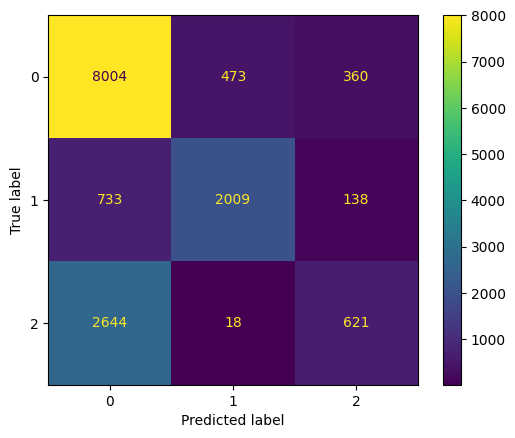

In [ ]:
#Gráfico de matriz de confusão:
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

Qualidade do PCA:

In [ ]:
#Obtenção dos dados:
aux = dataset_estelar.loc[:, dataset_estelar.columns != 'class'].values
aux

array([[1.23766096e+18, 1.35689107e+02, 3.24946318e+01, ...,
        5.81200000e+03, 5.63540000e+04, 1.71000000e+02],
       [1.23766488e+18, 1.44826101e+02, 3.12741849e+01, ...,
        1.04450000e+04, 5.81580000e+04, 4.27000000e+02],
       [1.23766096e+18, 1.42188790e+02, 3.55824442e+01, ...,
        4.57600000e+03, 5.55920000e+04, 2.99000000e+02],
       ...,
       [1.23766830e+18, 2.24587407e+02, 1.57007074e+01, ...,
        2.76400000e+03, 5.45350000e+04, 7.40000000e+01],
       [1.23766115e+18, 2.12268621e+02, 4.66603653e+01, ...,
        6.75100000e+03, 5.63680000e+04, 4.70000000e+02],
       [1.23766115e+18, 1.96896053e+02, 4.94646428e+01, ...,
        7.41000000e+03, 5.71040000e+04, 8.51000000e+02]])

⚠️ - Nesse caso, a grande quantidade de registros faz impossível calcular. Não rode o código porque ele desarma o Colab por excesso de consumo de RAM.

In [ ]:
#Gerando a matriz de covariância:
matriz_cov=np.cov(aux)
matriz_cov

Sendo a covariância a métrica estatística que mede a distância entre duas varíaveis, a matriz de covariância mede, par a par, a distância entre as variáveis que compõem, um parâmetro importantíssimo e fundamental para o PCA, pois dá a noção da dispersão entre os valores.

In [ ]:
#Geração dos autovalores e autovetores:
auto = np.linalg.eig(matriz_cov)
auto

Os autovalores e autovetores da matriz do covariância são outro parâmetro fundamento na geração do PCA, por meio deles que podemos multriplicar e obter um novo dimensionalizado.

In [ ]:
#Percentual de originalidade para 2D
from sklearn.decomposition import PCA
pca_visu = PCA(n_components=2)
componentes_principais_2 = pca_visu.fit_transform(xtrain)

print(pca_visu.explained_variance_ratio_)

[0.30989695 0.23079656]


Por meio dessa linha de código, foi calculado a variância dos dados em relação ao original. Isso serve medir o quão representativo o PCA está sendo. Se efetuar-se uma soma simples desses valores, terá quanto as novas colunas representam do banco, o ideal é que ele seja cada vez mais próximo de 100%, ou seja, com o menor número de colunas possíveis, tenha-se a maior quantidade de representatividade. Nesse caso, com duas colunas temos aproximidamente 54% dos dados originais, ou seja, com uma redução tão buscar, perdeu-se metade dos dados.

In [ ]:
#Percentual de originalidade para 8D
from sklearn.decomposition import PCA
pca_visu = PCA(n_components=8)
componentes_principais_8 = pca_visu.fit_transform(xtrain)

print(pca_visu.explained_variance_ratio_)

[0.30989695 0.23079656 0.136604   0.08289867 0.07127723 0.0601269
 0.05569405 0.05270562]


Veja que, com oito coluna, ou seja, metade da dimensão original (16 colunas), tem-se uma representatividade de cerca de 95% dos dados, melhor do que a anterior.

In [ ]:
#Gerando a tabela:
componentes_principais_df = pd.DataFrame(data = componentes_principais_2,
                                         columns = ['Componente principal 01','Componente principal 02'])
componentes_principais_df

,Componente principal 01,Componente principal 02
0,1.595209,-0.144387
1,1.821111,-0.191172
2,-1.698057,0.109182
3,0.078499,-0.128494
4,3.062733,-0.393235
...,...,...
84995,-0.104011,0.110130
84996,2.023596,-0.278278
84997,-2.872013,0.353368
84998,1.474851,-0.107239


Converteu-se os valores que se adquiriu com linha de código anterior numa tabela, pois, por meio dela é mais fácil de gerar um gráfico de dispersão.

In [ ]:
#Convertendo os rótulos numéricos para texto:
ytrain.astype(int)
ytrain = np.where(ytrain == 0, 'Galáxia', ytrain)
ytrain = np.where(ytrain == '1', 'Quase estrela', ytrain)
ytrain = np.where(ytrain == '2', 'Estrela', ytrain)

<Figure size 640x480 with 0 Axes>

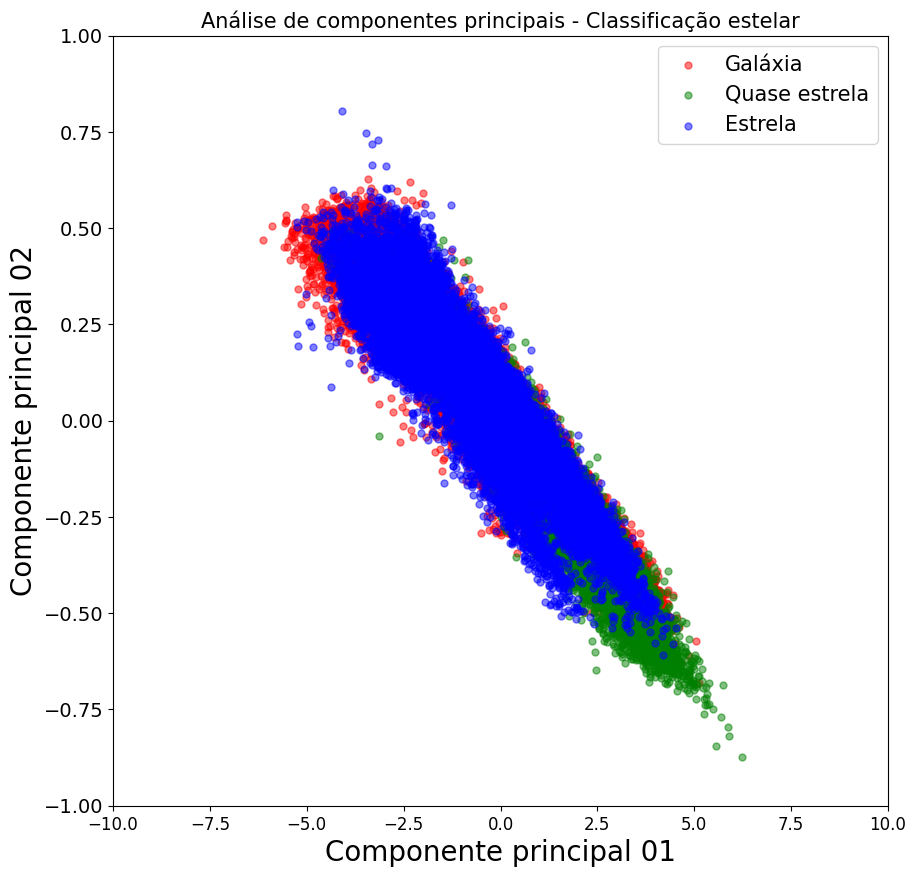

In [ ]:
#Configurando o gráfico:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=(12))
plt.yticks(fontsize=(14))
plt.xlabel('Componente principal 01',fontsize=20)
plt.ylabel('Componente principal 02',fontsize=20)
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title('Análise de componentes principais - Classificação estelar', fontsize=15)
targets=['Galáxia','Quase estrela','Estrela']
colors=['r','g','b']

for target, color in zip(targets,colors):
  indicesToKeep = ytrain == target
  plt.scatter(componentes_principais_df.loc[indicesToKeep, 'Componente principal 01'],
              componentes_principais_df.loc[indicesToKeep, 'Componente principal 02'],
              c = color, s = 25, alpha = 0.5)

plt.legend(targets,prop={'size':15})
plt.show()

Por meio do gráfico temos uma concretização do que visto acima. Um PCA 2D - duas colunas -, não é indicado para esse banco de dados. Como a dispersão está muito próxima, não seria possível traçar retas que determine os valores principais nesse caso.

##Caso 02: Classificação de preço

Inserção do banco:

In [ ]:
#Inserção do banco:
dataset_preco = pd.read_csv('/content/drive/MyDrive/Banco de dados/PCA_Preco.csv', delimiter=',')
dataset_preco

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
#Separando os recursos:
x = dataset_preco.iloc[:,:-1].values
y = dataset_preco.iloc[:,-1].values

Normalização dos dados:

In [ ]:
#Limpeza das variáveis:
del xtrain
del xtest

In [ ]:
#Normalização os dados dos eixos:
from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
xtrain = scale_obj.fit_transform(x.astype(float))
xtest = scale_obj.transform(x.astype(float))

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20)

Como os dados da coluna de classificações já são numéricos, nesse caso, não se fez necessário normalizá-los.

Inserção da modalidade de algoritmo de aprendizagem:

In [ ]:
#Algotimo de aprendizado modalidade Logistic Regression:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)
start_time = time.perf_counter()
model.fit(xtrain,ytrain)
end_time = time.perf_counter()

print(f'Tempo de treino {end_time - start_time} em segundos')

Tempo de treino 0.5035029860000009 em segundos


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Métrica de acurária:
print(f'O valor do score é: {model.score(xtest,ytest)}')

O valor do score é: 0.7525


Com isso, pode-se perceber que, para essa banco com os dados brutos, a classificação não foi naturalmente tão boa.

Gráfico de matriz de confusão:

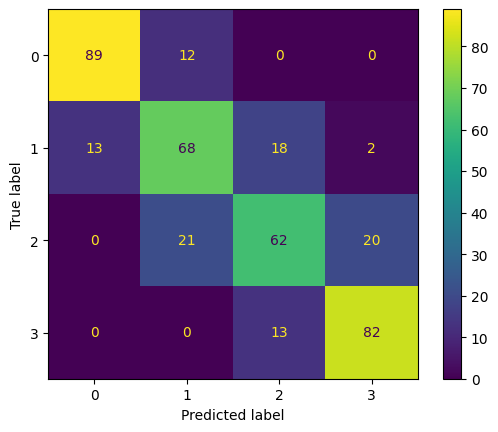

In [ ]:
#Gerando gráfico de matriz de confusão:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

Implementação do PCA:

In [ ]:
#Importando as bibliotecas:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

In [ ]:
#Aprendizado auxiliado por PCA:
model = LogisticRegression(solver = 'lbfgs', max_iter=400)
start_time = time.perf_counter()
model.fit(xtrain,ytrain)
end_time = time.perf_counter()

print(f'Tempo de treino: {end_time - start_time} em segundos')

Tempo de treino: 0.15251272200001154 em segundos


In [ ]:
#Métrica de acurácia:
print(f'O valor do score é: {model.score(xtest,ytest)}')

O valor do score é: 0.97


Aplicando o PCA para a dimensionalização das colunas para três, tem-se que o algoritmo melhora, e muito, a classificação, vez que agora ele tem dados mais significativo em menos colunas. Bem como o tempo também cai, como o esperado.

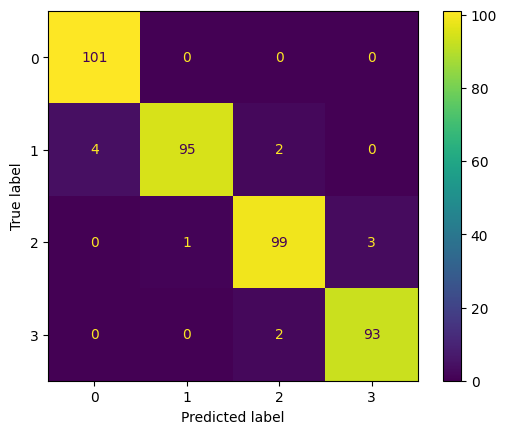

In [ ]:
#Gráfico de matriz de confusão:
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

Qualidade do PCA

In [ ]:
#Geração da matriz de covariância:
matriz_cov = np.cov(xtrain)
matriz_cov

array([[   6298.89761232,   35784.4949502 ,  -58478.68166694, ...,
         -74172.11512053,   11059.99327463,   33423.68840226],
       [  35784.4949502 ,  231891.18266419, -437970.82212878, ...,
        -499825.8784208 ,   69788.23851586,  215478.56345637],
       [ -58478.68166694, -437970.82212878,  933966.41302573, ...,
         978708.30919744, -128401.84286225, -404956.80399122],
       ...,
       [ -74172.11512053, -499825.8784208 ,  978708.30919744, ...,
        1088612.58313957, -149317.04918583, -463794.68601494],
       [  11059.99327463,   69788.23851586, -128401.84286225, ...,
        -149317.04918583,   21111.63208087,   64913.12728478],
       [  33423.68840226,  215478.56345637, -404956.80399122, ...,
        -463794.68601494,   64913.12728478,  200265.63481435]])

In [ ]:
#Geração dos autovalores e autovetores:
auto = np.linalg.eig(matriz_cov)
auto

EigResult(eigenvalues=array([ 6.89037852e+08+0.j,  1.88306058e+08+0.j,  3.17436785e-08+0.j, ...,
       -6.47336503e-13+0.j,  2.41903930e-13+0.j, -6.41975106e-12+0.j]), eigenvectors=array([[ 2.56370136e-03+0.j, -3.06600674e-03+0.j,  1.58071368e-03+0.j,
        ..., -9.46318237e-04+0.j, -2.55774114e-04+0.j,
         1.21132529e-03+0.j],
       [ 1.79797306e-02+0.j, -6.96898923e-03+0.j, -6.85435482e-03+0.j,
        ...,  2.83049133e-04+0.j, -8.98460779e-05+0.j,
        -6.05987211e-06+0.j],
       [-3.64302957e-02+0.j, -1.01757967e-02+0.j, -4.66643894e-02+0.j,
        ...,  4.49149284e-04+0.j,  6.05502374e-04+0.j,
        -1.07781973e-03+0.j],
       ...,
       [-3.95573109e-02+0.j,  7.43854888e-03+0.j,  9.05197744e-02+0.j,
        ...,  7.87527910e-04+0.j,  1.69157619e-03+0.j,
        -1.01126505e-02+0.j],
       [ 5.33217341e-03+0.j, -2.84192167e-03+0.j, -1.80577961e-02+0.j,
        ..., -3.72871390e-03+0.j, -3.88488237e-02+0.j,
        -3.03382868e-02+0.j],
       [ 1.66605068e-02+0.

In [ ]:
#Percentual de originalidade para 2D
from sklearn.decomposition import PCA
pca_visu = PCA(n_components=2)
componentes_principais_2 = pca_visu.fit_transform(xtrain)

print(pca_visu.explained_variance_ratio_)

[0.71258905 0.17023285]


Com duas colunas temos aproximidamente 88% dos dados originais, ou seja, com uma redução tão buscar, perdeu-se 22% dos dados, o que não é tão ruim.

In [ ]:
#Percentual de originalidade para 3D
from sklearn.decomposition import PCA
pca_visu = PCA(n_components=3)
componentes_principais_3 = pca_visu.fit_transform(xtrain)

print(pca_visu.explained_variance_ratio_)

[0.71258905 0.17023285 0.11717809]


Com três coluna temos quase 100% dos dados orginais englobados, o que explica, o que o algoritmo aprende tão bem com os dados quando dimensionalizados para três colunas, há uma perda de centésimos de dados, o que é insificante em relação a grandeza da amostra.

In [ ]:
#Gerando a tabela 2D:
componentes_principais_df2 = pd.DataFrame(data = componentes_principais_2,
                                         columns = ['Componente principal 01','Componente principal 02'])
componentes_principais_df2

,Componente principal 01,Componente principal 02
0,737.420563,579.140814
1,766.191361,-158.497043
2,-1350.108730,213.612235
3,971.238025,-553.605302
4,-1817.629232,-599.044339
...,...,...
1595,1038.318969,-565.950128
1596,1523.468107,-437.053838
1597,-1424.202996,509.531066
1598,-519.896507,-804.013707


In [ ]:
#Gerando a tabela 3D:
componentes_principais_df3 = pd.DataFrame(data = componentes_principais_3,
                                         columns = ['Componente principal 01','Componente principal 02','Componente principal 03'])
componentes_principais_df3

,Componente principal 01,Componente principal 02,Componente principal 03
0,737.420563,579.140814,668.640873
1,766.191361,-158.497043,70.636814
2,-1350.108730,213.612235,415.612411
3,971.238025,-553.605302,-385.247905
4,-1817.629232,-599.044339,-62.069679
...,...,...,...
1595,1038.318969,-565.950128,-446.441818
1596,1523.468107,-437.053838,-537.404132
1597,-1424.202996,509.531066,221.885784
1598,-519.896507,-804.013707,-714.803558


In [ ]:
#Convertendo as classes para texto:
ytrain = np.where(ytrain == 0, 'Barato', ytrain)
ytrain = np.where(ytrain == '1', 'Popular', ytrain)
ytrain = np.where(ytrain == '2', 'Caro', ytrain)
ytrain = np.where(ytrain == '3', 'Muito caro',ytrain)

<Figure size 640x480 with 0 Axes>

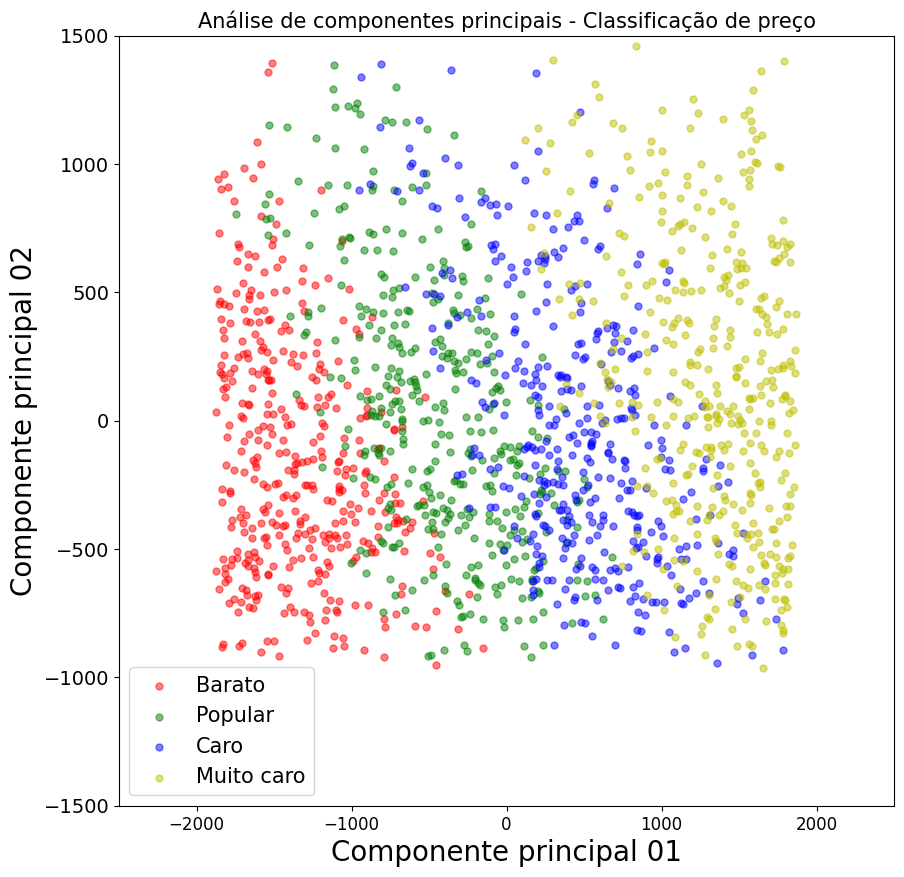

In [ ]:
#Configurando o gráfico 2D:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=(12))
plt.yticks(fontsize=(14))
plt.xlabel('Componente principal 01',fontsize=20)
plt.ylabel('Componente principal 02',fontsize=20)
plt.xlim(-2500,2500)
plt.ylim(-1500,1500)
plt.title('Análise de componentes principais - Classificação de preço', fontsize=15)
targets=['Barato','Popular','Caro','Muito caro']
colors=['r','g','b','y']

for target, color in zip(targets,colors):
  indicesToKeep = ytrain == target
  plt.scatter(componentes_principais_df2.loc[indicesToKeep, 'Componente principal 01'],
              componentes_principais_df2.loc[indicesToKeep, 'Componente principal 02'],
              c = color, s = 25, alpha = 0.5)

plt.legend(targets,prop={'size':15})
plt.show()

É notório a qualidade do PCA pois é possível traçar retas que separem os dados vermelhos, verdes, azuis e amarelos, ou seja há dispersão entre eles de tal forma que seja possível torná-lso independentes. Ou seja, esse é um caso de exemplo de PCA que funciona bem em 2D, o que conseguimos averiguar ao realizarmos o aprendizado três colunas.

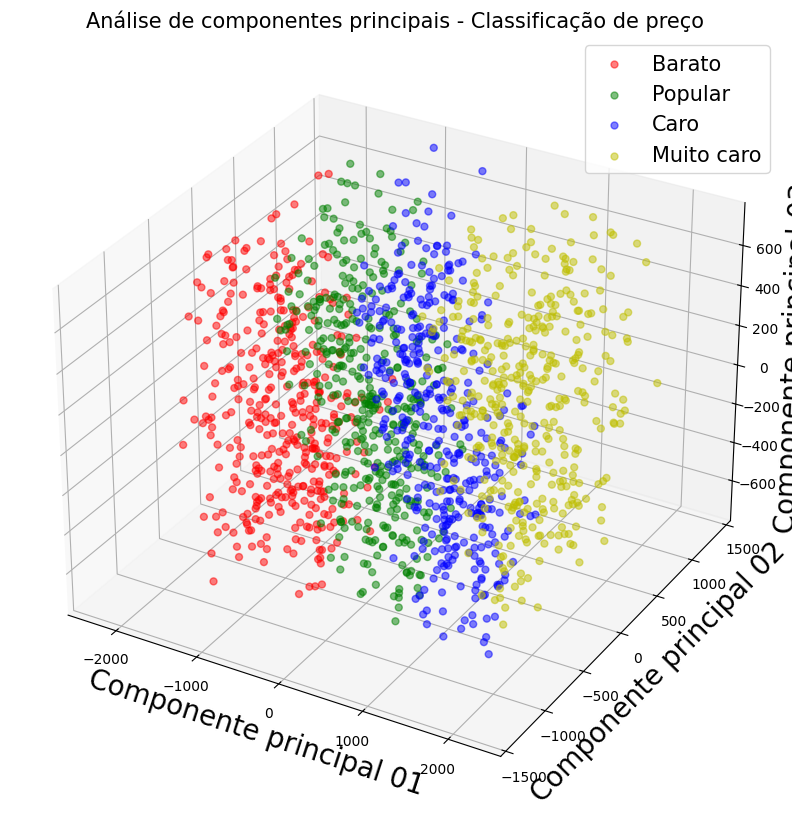

In [ ]:
#Configurando o gráfico 3D:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2500, 2500)
ax.set_ylim(-1500, 1500)
ax.set_zlim(-778, 778)
ax.set_xlabel('Componente principal 01', fontsize=20)
ax.set_ylabel('Componente principal 02', fontsize=20)
ax.set_zlabel('Componente principal 03', fontsize=20)
ax.set_title('Análise de componentes principais - Classificação de preço', fontsize=15)
targets = ['Barato', 'Popular', 'Caro', 'Muito caro']
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets, colors):
    indicesToKeep = ytrain == target
    ax.scatter(
        componentes_principais_df3.loc[indicesToKeep, 'Componente principal 01'],
        componentes_principais_df3.loc[indicesToKeep, 'Componente principal 02'],
        componentes_principais_df3.loc[indicesToKeep, 'Componente principal 03'],
        c=color, s=25, alpha=0.5
    )

ax.legend(targets, prop={'size': 15})
plt.show()

As observações são confirmada por meio do gráfico em 3D, vê-se que, com a aplicação do PCA para 3D, os dados se tornam dispersos e independentes, o que torna possível traçar as restas que os engloba.